In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def invertChannels(img):
    b,g,r = cv2.split(img) # split channels
    return cv2.merge([r,g,b]) # merge in rgb order to display with matplotlib

In [8]:
# mean square error
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    return err

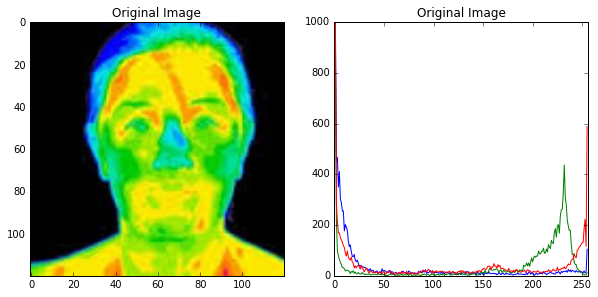

In [14]:
img_original = cv2.imread('../colorImages/face_thermogram.jpg')
img = cv2.imread('../colorImages/face_thermogram_3.jpg')

plt.figure(figsize=(10,10)) 

plt.subplot(221)
plt.imshow(invertChannels(img_original))
plt.title('Original Image')

plt.subplot(222)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_original],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256]) 
    plt.ylim([0,1000])
plt.title('Original Image')
   

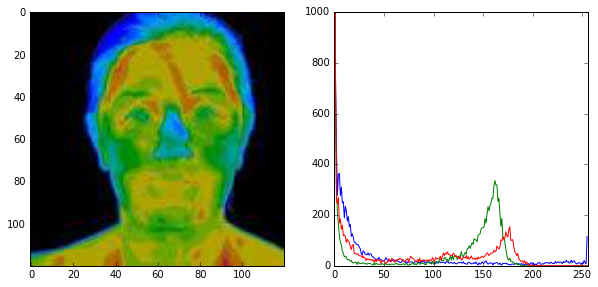

In [17]:

plt.figure(figsize=(10,10)) 
plt.subplot(223)
plt.imshow(invertChannels(img))

plt.subplot(224)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])    
    plt.ylim([0,1000])

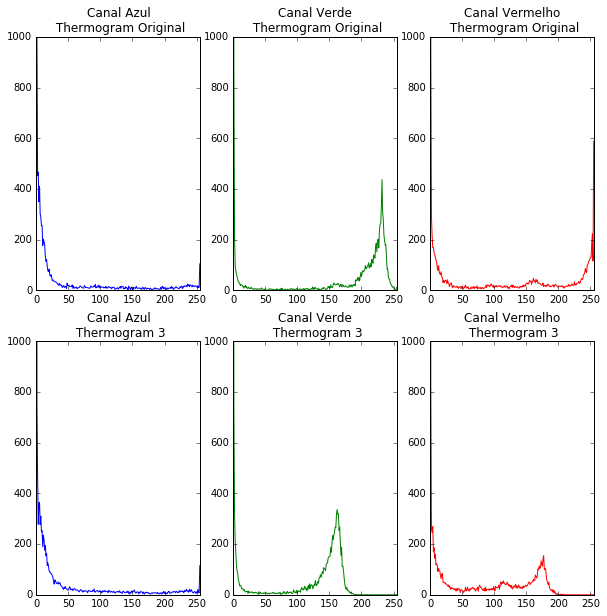

In [5]:
plt.subplot(231)
histr = cv2.calcHist([img_original],[0],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256]) 
plt.ylim([0,1000])
plt.title('Canal Azul\n Thermogram Original')   

plt.subplot(232)
histr = cv2.calcHist([img_original],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Verde\n Thermogram Original')  

plt.subplot(233)
histr = cv2.calcHist([img_original],[2],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Vermelho\n Thermogram Original')  

plt.subplot(234)
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr,color = 'b')
plt.xlim([0,256]) 
plt.ylim([0,1000])
plt.title('Canal Azul\n Thermogram 3')   

plt.subplot(235)
histr = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histr,color = 'g')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Verde\n Thermogram 3')  

plt.subplot(236)
histr = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histr,color = 'r')
plt.xlim([0,256])
plt.ylim([0,1000])
plt.title('Canal Vermelho\n Thermogram 3')  

# Problema: Canais de cor verde e vemelho com intensidades menores

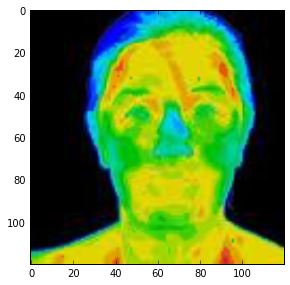

In [11]:

# split channels
b,g,r = cv2.split(img)

# add intensity for green and red channels
for i in range(g.shape[0]):
    for j in range(g.shape[1]):
        if g[i,j] >= 100:
            g[i,j] += 50
            
for i in range(r.shape[0]):
    for j in range(r.shape[1]):
        if r[i,j] >= 100:
            r[i,j] += 50            


image_enhanced =cv2.merge((b,g,r))

plt.figure(figsize=(10,5)) 
plt.subplot(121)
plt.imshow(invertChannels(image_enhanced))


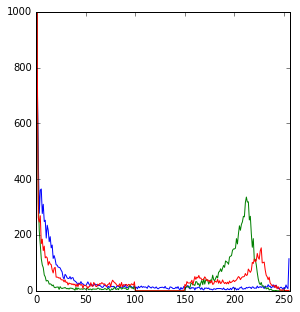

In [13]:

plt.figure(figsize=(10,5)) 
plt.subplot(122)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image_enhanced],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.ylim([0,1000])

In [10]:
# mean square error comparation
print "MSE between Original and Thermogram 3: %s" % mse(img_original,img)
print "MSE between Original and Thermogram 3 enchanced: %s" % mse(img_original,image_enhanced)

MSE between Original and Thermogram 3: 4214.653125
MSE between Original and Thermogram 3 enchanced: 679.559791667
